# Ring Resonators

A ring resonator is a device that consists of a ring and then one or two waveguides. Light enters the ring via a directional coupler, also called an access waveguide or a bus. There are single and double bus designs. In a single bus design, light is coupled in and out of the ring via the same waveguide. In a double bus design, there are two waveguides, one on each side of the ring, that can couple into or out of the ring. If you remember coupling theory from the directional coupler notebook, you remember that the distance between the ring and the waveguide will affect how much light is coupled into the ring. 

When light propagates around a ring, the fields that overlap from each trip around the ring interfere. When waves overlap perfectly and the interference of the waves is constructive, we say that the ring is in resonance. Resonance is a useful quality because a particular ring can only be in resonance at certain wavelengths. Thus, we can isolate certain wavelengths with the ring. Such isolation has many applications. 

<div style="text-align: center;">

![dir_cplr](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/ring_resonator.png?raw=true)

</div>

<p style="text-align: center;"> Layout of a racetrack ring resonator in gdsfactory </p>


To understand more about ring resonators, let's build up some of its behavior mathematically. First, we want examine how far the light has to travel around the ring. This is simply the familiar equation for the circumference of a circle if the ring is perfectly round.

$L = 2\pi r =$ length of one trip around the ring

Within this one loop around the ring, there is a round trip loss, or some attenuation that occurs. This is referred to as $A$ and is described by

$A = e^{-\alpha L}$

where  $\alpha$ is the waveguide loss $(cm^{-1})$.

Now that we know how to describe the power within the ring, we'll want to solve for how much power goes in and out of a ring resonator. For this, you can find the ratio of the electric field at both the input and the output ports. This ratio will tell you if more light is going into the ring or out of it. To find the fields at each of the four ports of the directional coupler (two inside the ring and two in the waveguide), we start by defining the two output ports. We then move on to find the field on the input side of the ring resonator, seen on the right of the diagram. Plugging this into our two original equations and solving can lead us to the transfer function. The two electric fields are:

$E_{b1} = tE_{a1}+\kappa E_{a2}$

$E_{b2} = -\kappa E_{a1}+tE_{a2}$

Where

$|\kappa|^2$ is the power transferred to and from the ring and $|t|^2 = 1 - |\kappa|^2$ is the power remaining.

Remembering that $\alpha$ is the waveguide loss $(cm^{-1})$ and $\beta = \frac{2 \pi n}{\lambda}$ is the propagation constant $(cm^{-1})$, we can then define the Ring Resonator Transfer Function as the ratio of the output and input electric fields squared.

$ T = \left|\frac{E_{b1}}{E_{a1}}\right|^2 = \left|\frac{t-e^{-\alpha L/2}e^{j \beta L}}{1-e^{-\alpha L/2}e^{j \beta L}} \right|^2$

### Resonance

We have already introduced the concept of resonance in this notebook. Let us now explain it more fully. A ring is in resonance when $\beta L = m2\pi$. Or rather,

$m \frac{\lambda}{n_{\text{eff}( \lambda )}} = 2\pi r$

$m$ is the mode number (which must be positive) of the ring resonator and $\lambda$ is the resonant wavelength. More intuitively, the equation says that the circumference of the ring must be an integer multiple of the resonant wavelength. If it is not, there is no way that the wave can interfere constructively with itself on multiple trips around the ring. Using these same quantities in the equation for resonance, we can also define the optical path length difference (OPD) as $=m \lambda$. 

### Critical Coupling

Critical coupling occurs when all of the light from the waveguide is coupled into the ring and is not coupled back into the waveguide.

Transmission is 0 when $t - e^{\frac{-\alpha L}{2}}= 0$

Or $t = e^{\frac{-\alpha L}{2}}$ so that $t^2 = e^{-\alpha L}$ which how much light transmitted around the ring.

So the loss around the ring is $1-e^{-\alpha L}$ and since $|\kappa|^2 = 1 - |t|^2 = \text{loss}$, then $|\kappa|^2 = 1-e^{-\alpha L}$. So, when the coupling loss is equal to the roundtrip loss around the ring, there is critical coupling.

This is similar to the concept of impedance matching in electrical circuits, where the most power is transferred when the load matches the input impedance. However, it is more complicated in ring resonators.

**Graph showing the behavior of the ring**

### FSR- Free Spectral Range

The FSR is the space between resonant wavelengths. This can be seen on the graph as the distance from peak to peak.

$FSR \approx \frac{\lambda ^2}{n_{\text{eff}}L}$

The full-width half-maximum (FWHM) aka bandwidth of resonances, is used with the FSR to calculate finesse (the ratio of FSR to FWHM, measure of narrowness of peaks/resonances). With the FSR, FWHM, and finesse, the behavior of the rings' resonances can be analyzed.

### Quality Factor

The quality factor measures how sharp the resonance peaks are with respect to the operating frequency of the ring. It defined as the ratio of the resonance frequency to the FWHM. A low quality factor indicates more loss in the resonator. A higher Q means less loss and a sharper peak. 

While finesse accounts for FSR when talking about the resonance bandwidth, the Q factor accounts for the frequency.

### Applications

Ring resonators have many applications since you can "filter" certain wavelengths with your ring. Two such applications are tuning and whispering gallery mode switches. More applications or variations of ring resonators can be seen on GDS Factory. There are many different implementations for the ring resonator in their documentation.

### Fields in a Ring Resonator

The following Meep script sets up a single bus ring resonator and runs a simulation that tracks the electric field to eventually create a gif. Find a combination of the radius and wavelength that will lead to resonance. Also, feel free to change the coupling gap.

     cylinder, center = (0,1.5,0)
          radius 10.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,1.5,0)
          radius 9.75, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,-9.05,0)
          size (24.5,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)


<Axes: xlabel='X', ylabel='Y'>

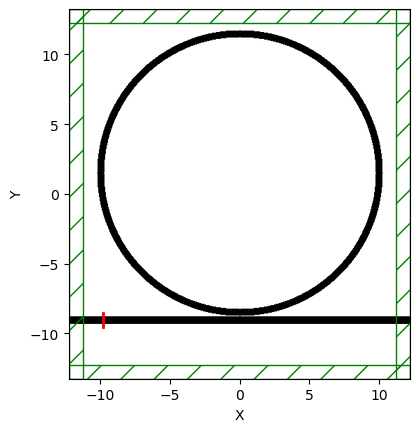

In [14]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

# Create a ring resonator with a radius of 10um

# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define geometrical parameters
d_pml = 1 # thickness of the pml
d_pad = 1 # thickness of padding around geometry
wg_width = 0.5 # width of the coupling waveguide
r = 10          ## CHANGE RADIUS
r_in = r - wg_width / 2
r_out = r + wg_width / 2
wg_length = 2 * r_out + 2 * d_pad + 2 * d_pml # length of the waveguide
gap = 0.3 # gap between waveguide and ring
wvl = 1.55      ## CHANGE WAVELENGTH

pml = [mp.PML(d_pml)]
Sx = 2 * r_out + 2 * d_pad + 2 * d_pml # width of the cell
Sy = 2 * r_out + 4 * d_pad + 2 * d_pml # length of the cell

geometry = [mp.Cylinder(radius=r_out, material=Si, center=mp.Vector3(0,d_pad*1.5)),
            mp.Cylinder(radius=r_in, material=SiO2, center=mp.Vector3(0,d_pad*1.5)),
            mp.Block(size=(wg_length,wg_width), center=mp.Vector3(0, -r_out+d_pad*1.5-gap), material=Si)]

# Create Eigenmode pulse source
fcen = 0.15
width = 0.1
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0),
        size=mp.Vector3(0,1),
        center=mp.Vector3(-0.4*Sx, -r_out+d_pad*1.5-gap))
        ]

# Set up simulation
sim = mp.Simulation(
    resolution=20,
    default_material=SiO2,
    cell_size=mp.Vector3(Sx,Sy),
    geometry=geometry,
    boundary_layers=pml,
    sources=source
)

sim.plot2D()

In [15]:
from PIL import Image
import glob
import os

# Capture electric field intensity over time and output into a gif
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(2, mp.output_efield_z)),
        until=600)

# Generate pngs from the simulation output
# This line assumes that colormaps are working, 
# you are in the same directory as the output files, 
# and that h5py is installed
# If you have a problem with h5utils, see note below
os.system("h5topng -t 0:299 -R -Zc /home/ebang4/miniconda3/envs/h5utils/share/h5utils/colormaps/RdBu -A /home/ebang4/Github/Photonics-Bootcamp/book/pages/eps-000000.00.h5 -a /home/ebang4/miniconda3/envs/h5utils/share/h5utils/colormaps/gray /home/ebang4/Github/Photonics-Bootcamp/book/pages/ez.h5")

# Create a gif from the pngs
frames = []
imgs = glob.glob("ez.t*")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('ez.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               loop=0)

# Clean up workspace by deleting all generated images
for i in imgs: 
    os.remove(i)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00481606 s
Working in 2D dimensions.
Computational cell is 24.5 x 26.5 x 0 with resolution 20
     cylinder, center = (0,1.5,0)
          radius 10.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,1.5,0)
          radius 9.75, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,-9.05,0)
          size (24.5,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
time for set_epsilon = 0.986661 s
-----------
MPB solved for frequency_1(1,0,0) = 0.343021 after 15 iters
MPB solved for frequency_1(0.340933,0,0) = 0.130152 after 7 iters
MPB solved for frequency_1(0.39538,0,0) = 0.149796 after 6 iters
MPB solved for frequency_1(0.395952,0,0) = 0.15 after 5 iters
MPB solved for frequency_1(0.395952,0,

FloatProgress(value=0.0, description='0% done ', max=600.0)

creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
Meep progress: 16.0/600.0 = 2.7% done in 4.1s, 148.5s to go
on time step 654 (time=16.35), 0.00611856 s/step
Meep progress: 32.875/600.0 = 5.5% done in 8.1s, 139.3s to go
on time step 1328 (time=33.2), 0.00593552 s/step
Meep progress: 47.825/600.0 = 8.0% done in 12.1s, 139.5s to go
on time step 1920 (time=48), 0.0068397 s/step
Meep progress: 64.45/600.0 = 10.7% done in 16.1s, 133.6s to go
on time step 2600 (time=65), 0.00588971 s/step
Meep progress: 81.35000000000001/600.0 = 13.6% done in 20.1s, 128.1s to go
on time step 3276 (time=81.9), 0.00592451 s/step
Meep progress: 97.875/600.0 = 16.3% done in 24.1s, 123.6s to go
on time step 3925 (time=98.125), 0.00617059 s/step
Meep progress: 112.325/600.0 = 18.7% done in 28.1s, 122.0s to go
on time step 4514 (time=112.85), 0.00679162 s/step
Meep progress: 128.625/600.0 = 21.4% done in 32.1s, 117.6s to go
on time step 5170 (time=129.25), 0.00609934 s/step
Meep progre

### Simulation

To fully simulate a ring resonator and find its resonances, it is often best to only simulate half of the ring. Otherwise, the time that it takes for the fields to decay in the resonator is too long and the computation gets out of hand (as shown above where the fields were not close to decaying despite running the simulation for 600 time steps). Below is a Meep script to simulate half a ring resonator and find useful parameters. 

     cylinder, center = (0,-7.125,0)
          radius 10.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     cylinder, center = (0,-7.125,0)
          radius 9.75, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,3.425,0)
          size (24.5,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)


<Axes: xlabel='X', ylabel='Y'>

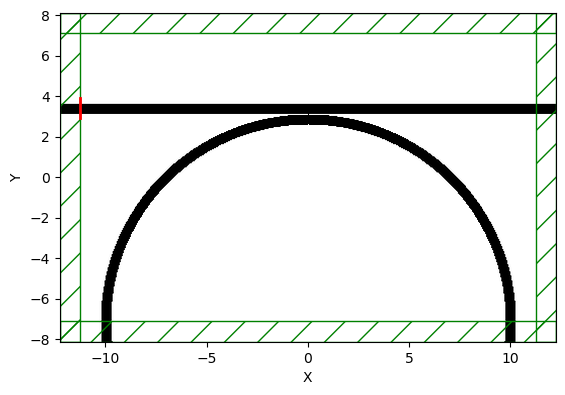

In [12]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

# Create a ring resonator with a radius of 10um

# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define geometrical parameters
d_pml = 1 # thickness of the pml
d_pad = 1 # thickness of padding around geometry
wg_width = 0.5 # width of the coupling waveguide
r = 10          ## CHANGE RADIUS
r_in = r - wg_width / 2
r_out = r + wg_width / 2
wg_length = 2 * r_out + 2 * d_pad + 2 * d_pml # length of the waveguide
gap = 0.3 # gap between waveguide and ring
wvl = 1.55      ## CHANGE WAVELENGTH
gap = 0.3       ## CHANGE GAP

pml = [mp.PML(d_pml)]
Sx = 2 * r_out + 2 * d_pad + 2 * d_pml # width of the cell
Sy = r_out + 4 * d_pad + 2 * d_pml # length of the cell
wg_center = -Sy / 2 + r_out + d_pml + gap

geometry = [mp.Cylinder(radius=r_out, material=Si, center=mp.Vector3(0,-Sy/2 + d_pml)),
            mp.Cylinder(radius=r_in, material=SiO2, center=mp.Vector3(0,-Sy/2 + d_pml)),
            mp.Block(size=(wg_length,wg_width), material=Si, center=mp.Vector3(0, wg_center))]

# Create Eigenmode pulse source
fcen = 0.15
width = 0.1
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0),
        size=mp.Vector3(0,1),
        center=mp.Vector3(-Sx/2+d_pml+0.1, wg_center))
        ]

# Ok so these are the things to calculate the power
'''output_lo_mode = sim.add_mode_monitor(freq, fwidth, nfreqs, mp.ModeRegion(center= mp.Vector3(-end_of_input,-wg_center_y,0), size=mon_size, direction=mp.Z))
outputLoAlpha = sim.get_eigenmode_coefficients(output_lo_mode,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y, direction=mp.Z).alpha[0,:,0]
trans_Lo = abs(outputLoAlpha[:])**2/abs(incident_mode_alpha[:])**2'''

# Set up simulation
sim = mp.Simulation(
    resolution=20,
    default_material=SiO2,
    cell_size=mp.Vector3(Sx,Sy),
    geometry=geometry,
    boundary_layers=pml,
    sources=source
)

sim.plot2D()